## Analysis of tidal gauge record
### from University of Hawaii SEA LEVEL CENTER: http://uhslc.soest.hawaii.edu/data/?fd#uh055 kwajalein site 
#### comparison of research quality and fast delivery datasets
#### estimation of astronomical tide

In [7]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

# basic import
import os
import os.path as op

# python libs
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

<xarray.Dataset>
Dimensions:     (time: 342357)
Coordinates:
  * time        (time) datetime64[ns] 1975-12-31T12:00:00 ... 2014-02-11T12:00:00
Data variables:
    TIDE        (time) float64 ...
    NTR         (time) float64 ...
    WaterLevel  (time) float64 ...
<xarray.Dataset>
Dimensions:    (time: 184104)
Coordinates:
  * time       (time) datetime64[ns] 1996-01-01 ... 2016-12-31T23:00:00.000002944
Data variables:
    observed   (time) float64 ...
    ntr        (time) float64 ...
    sigma      (time) float64 ...
    predicted  (time) float64 ...


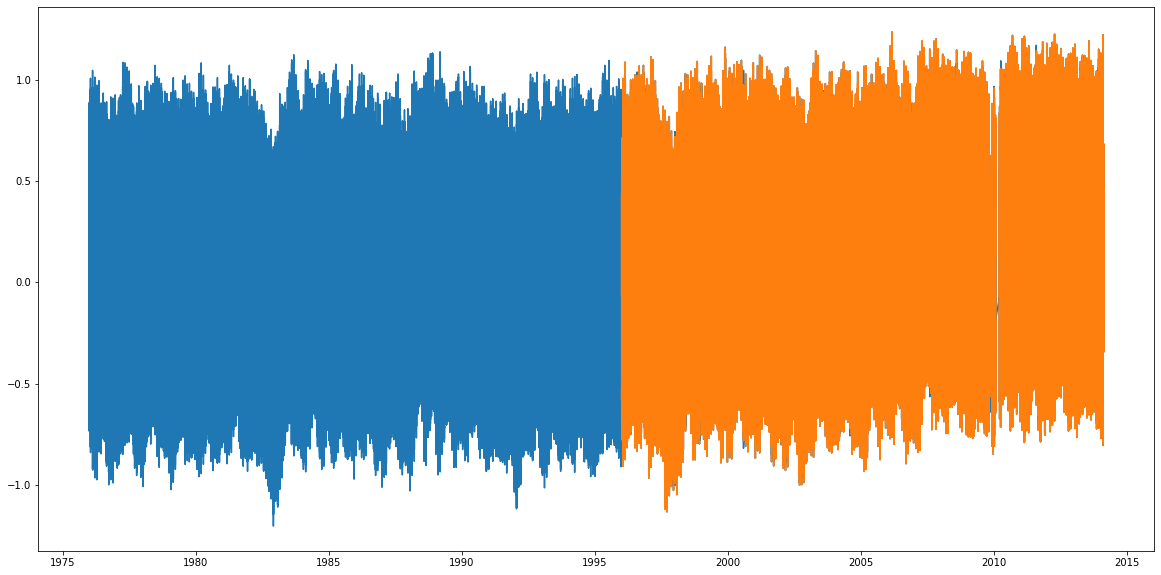

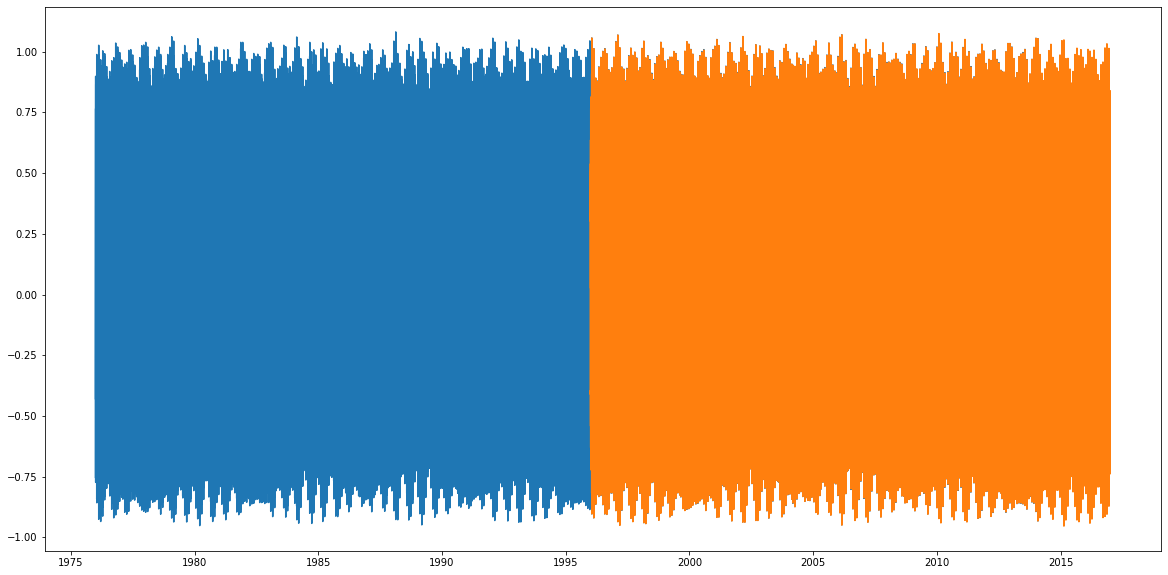

In [20]:
path_data_original = r'/Users/anacrueda/Documents/Proyectos/TESLA/data/sites/ROI_o_1/TIDE/'

xds_ml = xr.open_dataset(path_data_original + 'Mareografo_KWA.nc')
xds_at = xr.open_dataset(path_data_original + 'tide_astro_hist.nc')

print(xds_ml)
print(xds_at)


plt.figure(figsize=(20,10))
plt.plot(xds_ml.time, xds_ml.WaterLevel, label='water level')
plt.plot(xds_at.time, xds_at.observed-np.mean(xds_at.predicted), label='water level 2')
plt.show()

plt.figure(figsize=(20,10))
plt.plot(xds_ml.time, xds_ml.TIDE, label='tide')
plt.plot(xds_at.time, xds_at.predicted-np.mean(xds_at.predicted), label='tide 2')
plt.show()

<xarray.Dataset>
Dimensions:               (record_id: 1, time: 649259)
Coordinates:
  * time                  (time) datetime64[ns] 1946-06-07T13:00:00.028800 ... 2020-06-30T22:59:59.971200
  * record_id             (record_id) int16 550
Data variables:
    sea_level             (record_id, time) float32 ...
    lat                   (record_id) float32 ...
    lon                   (record_id) float32 ...
    station_name          (record_id) |S9 ...
    station_country       (record_id) |S22 ...
    station_country_code  (record_id) float32 ...
    uhslc_id              (record_id) int16 ...
    gloss_id              (record_id) float32 ...
    ssc_id                (record_id) |S4 ...
    last_rq_date          (record_id) datetime64[ns] ...
Attributes:
    title:                  UHSLC Fast Delivery Tide Gauge Data (hourly)
    ncei_template_version:  NCEI_NetCDF_TimeSeries_Orthogonal_Template_v2.0
    featureType:            timeSeries
    Conventions:            CF-1.6, ACDD-1.3


/Users/anacrueda/Documents/Proyectos/TESLA/teslakit/venv/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


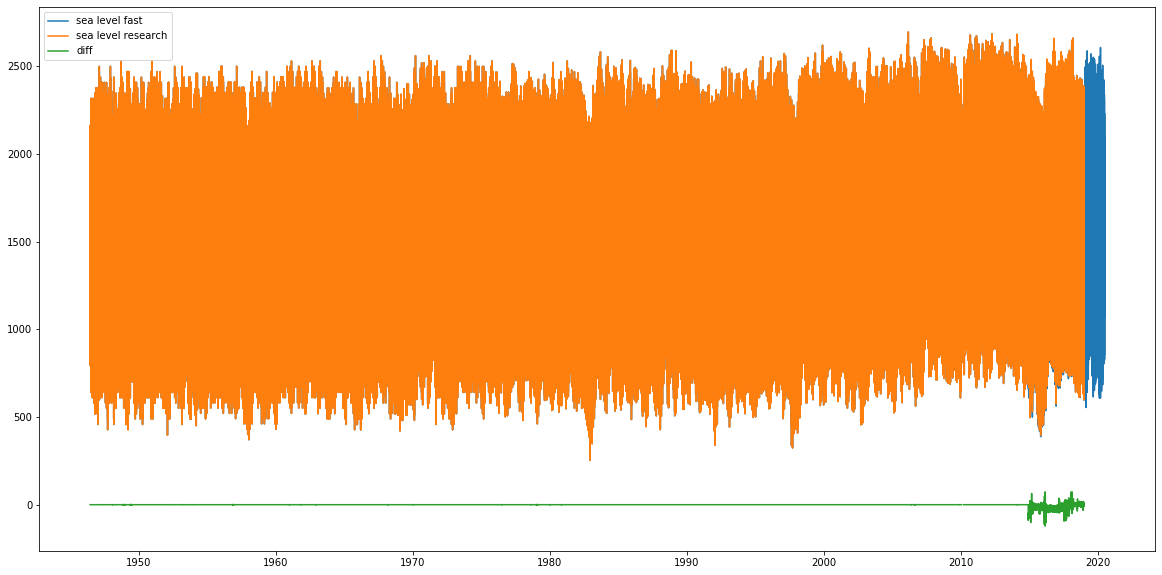

In [32]:
## water levels from hawaii sea level center
path_data_original = r'/Users/anacrueda/Documents/Proyectos/TESLA/data/sites/ROI/TIDE/'
#fast delivery
xds_hfast = xr.open_dataset(path_data_original + 'h055_fastdelivery.nc')
print(xds_hfast)
# research quality
xds_hres = xr.open_dataset(path_data_original + 'h055a.nc')
print(xds_hres)

wl_common = xds_hfast.sea_level.where(xds_hfast.time==xds_hres.time)[0,:]

plt.figure(figsize=(20,10))
plt.plot(xds_hfast.time, xds_hfast.sea_level[0,:], label='sea level fast')
plt.plot(xds_hres.time, xds_hres.sea_level[0,:], label='sea level research')
plt.plot(xds_hres.time,wl_common-xds_hres.sea_level[0,:], label='diff')
plt.legend()
plt.show()

# it will be better to use the research quality data due to differences between datasets that might induce to error

/Users/anacrueda/Documents/Proyectos/TESLA/teslakit/venv/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


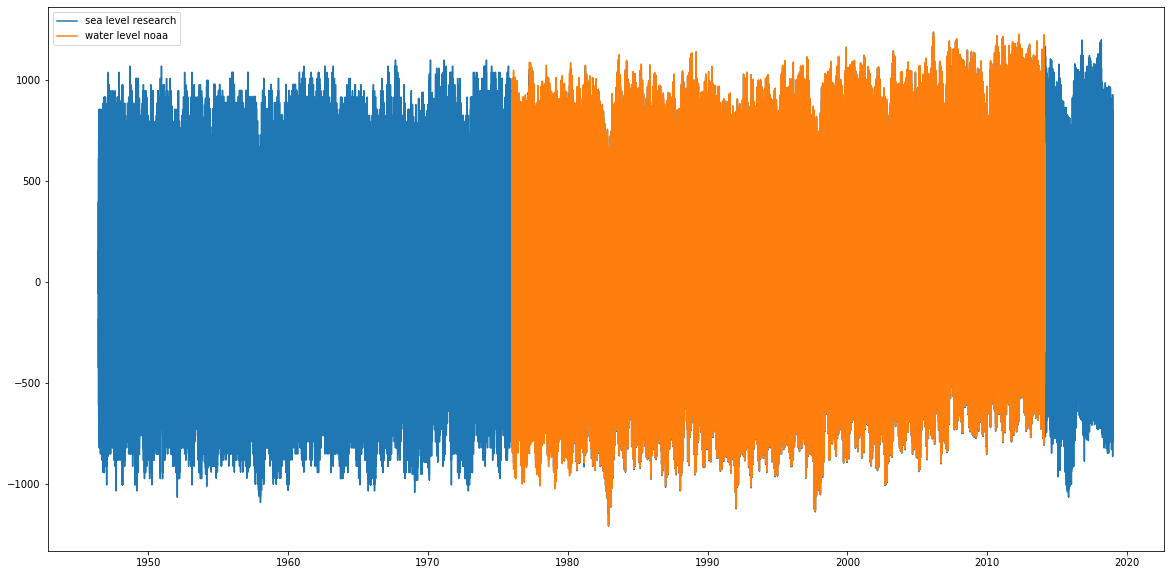

In [39]:
# compare the previous dataset with the research quality to find if there is any dates offset

plt.figure(figsize=(20,10))
plt.plot(xds_hres.time, xds_hres.sea_level[0,:]-np.mean(xds_hres.sea_level[0,0:600000]), label='sea level research')
plt.plot(xds_ml.time, xds_ml.WaterLevel*1000, label='water level noaa')
plt.legend()
plt.show()

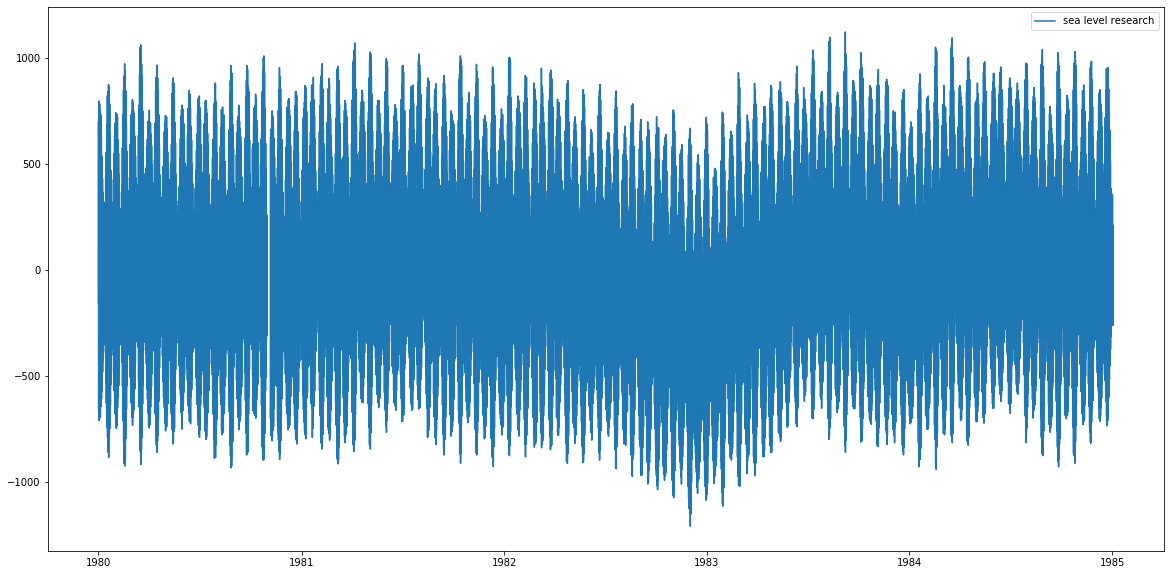

In [45]:

xds_hres_zoom = xds_hres.sel(time=slice('1980-01-01','1985-01-01'))
#xds_ml_zoom = xds_ml.sel(time=xds_hres_zoom.time.values[:])

plt.figure(figsize=(20,10))
plt.plot(xds_hres_zoom.time, xds_hres_zoom.sea_level[0,:]-np.mean(xds_hres.sea_level[0,0:600000]), label='sea level research')
#plt.plot(xds_ml_zoom.time, xds_ml_zoom.WaterLevel*1000, label='water level noaa')
plt.legend()
plt.show()

In [56]:
## SST database

path_sst = r'/Users/anacrueda/Documents/Data/'
xds_sst = xr.open_dataset(path_sst + 'ersst.v5.nc')

path_sst_tesla = r'/Users/anacrueda/Documents/Proyectos/TESLA/data/sites/ROI_o_1/SST/'
xds_sst_tesla = xr.open_dataset(path_sst_tesla + 'SST_1854_2017_Pacific.nc')

print(xds_sst_tesla)

# selection of the area of interest
data_sel = xds_sst.sel(lat=slice(-5, 5), lon=slice(120, 280))  # seleccionar area
data_sel = data_sel.rename({'lon':'longitude'})
data_sel = data_sel.rename({'lat':'latitude'})
data_sel = data_sel.transpose('longitude','latitude','time')
print(data_sel)
p_save = r'/Users/anacrueda/Documents/Proyectos/TESLA/data/sites/ROI/SST/SST_1854_2020_Pacific.nc'
data_sel.to_netcdf(p_save, 'w')

<xarray.Dataset>
Dimensions:     (latitude: 5, longitude: 81, time: 1961)
Coordinates:
  * latitude    (latitude) float32 4.0 2.0 0.0 -2.0 -4.0
  * longitude   (longitude) float32 120.0 122.0 124.0 ... 276.0 278.0 280.0
  * time        (time) datetime64[ns] 1854-01-01 1854-02-01 ... 2017-05-01
Data variables:
    SST         (longitude, latitude, time) float64 ...
    SST_runavg  (longitude, latitude, time) float64 ...
<xarray.Dataset>
Dimensions:    (latitude: 5, longitude: 81, time: 1999)
Coordinates:
  * latitude   (latitude) float64 -4.0 -2.0 0.0 2.0 4.0
  * longitude  (longitude) float64 120.0 122.0 124.0 126.0 ... 276.0 278.0 280.0
  * time       (time) datetime64[ns] 1854-01-01 1854-02-01 ... 2020-07-01
Data variables:
    sst        (longitude, latitude, time) float64 ...
    ssta       (longitude, latitude, time) float64 ...
Attributes:
    Conventions:                     CF-1.6, ACDD-1.3
    metadata_link:                   https://doi.org/10.7289/V5T72FNM
    dataset_doi:  